In [1]:
from TSP_Formulation_Methods import *
import numpy as np
import glob

distances_original_matrix = np.loadtxt("./data/matriz-rutas-granada")


# Global parameters

N = 5 # Number of stops
p = 2 # Number of travels, aka number of edges. The number of involucred stops is then p+1

startNodes = [0,2]
endNodes = [1,4]
L = len(startNodes)

# process parameters

p = min(p, N-1)
startNodes = [min(N-1, s) for s in startNodes]
endNodes = [min(N-1, s) for s in endNodes]


distances_N_stops_normalized = distances_original_matrix[:N,:N]/np.max(distances_original_matrix[:N,:N])

In [8]:
num_reads = 1000
all_lambdas = [load_lambda_means("lambdas_N_5_p_2"), load_lambda_means("lambdas_N_3_p_2")] 

solutions_multiple_lines = generate_solutions_for_multiple_lines(distances_N_stops_normalized, p, startNodes, endNodes, L, all_lambdas, num_reads)

check_multiline_validity(solutions_multiple_lines, N, p, startNodes, endNodes, L)

Solution 1 is not valid.


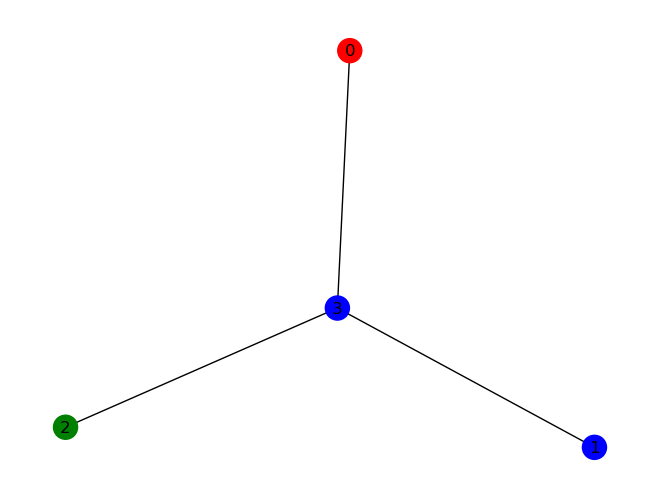

In [14]:
draw_solution_graph(solutions_multiple_lines[0], distances_N_stops_normalized, p, startNodes[0], endNodes[0])

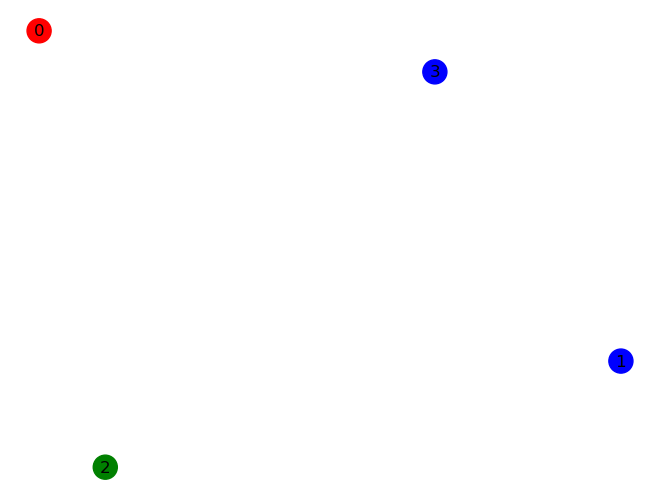

In [15]:
draw_solution_graph(solutions_multiple_lines[1], distances_N_stops_normalized, p, startNodes[1], endNodes[1])

In [4]:
# Try to solve in an uniformed way

all_lambdas = [[(5-i)*load_lambda_means("lambdas_N_{}_p_{}".format(N,p))[i] for i in range(5)] for l in range(L)]  # Load the same lambdas for all lines
num_reads = 20000


solutions_multiple_lines_uninformed = generate_solutions_for_multiple_lines_uninformed(distances_N_stops_normalized, p, startNodes, endNodes, L, all_lambdas, num_reads)

check_multiline_validity(solutions_multiple_lines_uninformed, N, p, startNodes, endNodes, L)

solution_cost = distance_cost_of_multilines(solutions_multiple_lines_uninformed, distances_N_stops_normalized, p, bidirectional=True)

print("Cost of the solution: ", solution_cost)

Q_matrix_optimal,_ = create_QUBO_matrix(distances_N_stops_normalized, p, startNodes[1], endNodes[1], all_lambdas[1])

if is_symmetric(Q_matrix_optimal):
    print("Q is symmetric")
    np.savetxt("./data/Q_matrix_optimal", Q_matrix_optimal)

All solutions are valid.
Cost of the solution:  4.4652103791500855
Q is symmetric


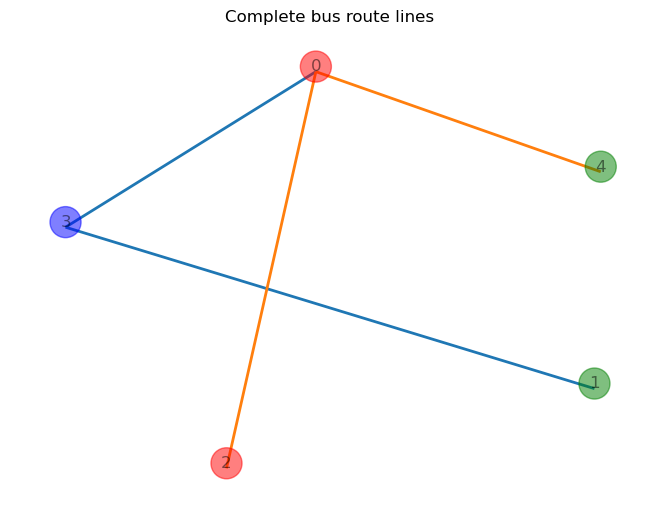

In [5]:
draw_multiple_solutions_graph(solutions_multiple_lines_uninformed, distances_N_stops_normalized, p, startNodes, endNodes)

In [2]:
# Try to solve in an uniformed way trying different start and end nodes and minimizing the total distance

all_start_end_combinations = generate_all_start_end_combinations(N, L)

In [3]:
best_solution = None
best_solution_cost = 1000 # Silly high value
best_solution_startNodes = None
best_solution_endNodes = None
print("Longitude of all_start_end_combinations: ", len(all_start_end_combinations))
num_reads = 1000
for startNodes, endNodes in all_start_end_combinations:
    all_lambdas_best = [[(5-i)*load_lambda_means("lambdas_N_{}_p_{}".format(N,p))[i] for i in range(5)] for l in range(L)]
    solutions_multiple_lines_uninformed = generate_solutions_for_multiple_lines_uninformed(distances_N_stops_normalized, p, startNodes, endNodes, L, all_lambdas_best, num_reads)
    total_distance = distance_cost_of_multilines(solutions_multiple_lines_uninformed, distances_N_stops_normalized, p, bidirectional=True)
    if check_multiline_validity(solutions_multiple_lines_uninformed, N, p, startNodes, endNodes, L, returnFormat=True):
        if best_solution_cost > total_distance:
            best_solution = solutions_multiple_lines_uninformed
            best_solution_cost = total_distance
            best_solution_startNodes = startNodes
            best_solution_endNodes = endNodes

    if best_solution is None:
        best_solution = solutions_multiple_lines_uninformed
        best_solution_cost = total_distance
        best_solution_startNodes = startNodes
        best_solution_endNodes = endNodes

# all_lambdas_fine_tunning = [load_lambda_means("lambdas_N_{}_p_{}_startNode_{}_endNode_{}".format(N,p,startNodes[l],endNodes[l])) for l in range(L)]
print("Best solution cost: ", best_solution_cost)
print("Best solution startNodes: ", best_solution_startNodes)
print("Best solution endNodes: ", best_solution_endNodes)
check_multiline_validity(best_solution, N, p, best_solution_startNodes, best_solution_endNodes, L)

Longitude of all_start_end_combinations:  60
Best solution cost:  2.2326051895750427
Best solution startNodes:  [0 2]
Best solution endNodes:  [1 4]
All solutions are valid.


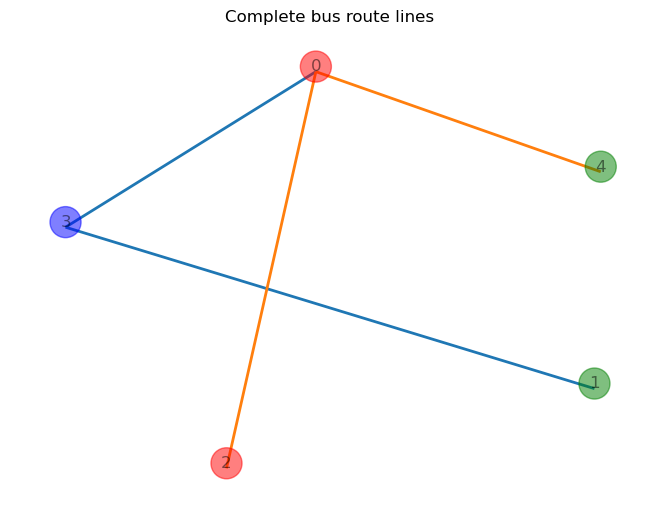

In [4]:
draw_multiple_solutions_graph(best_solution, distances_N_stops_normalized, p, best_solution_startNodes, best_solution_endNodes)

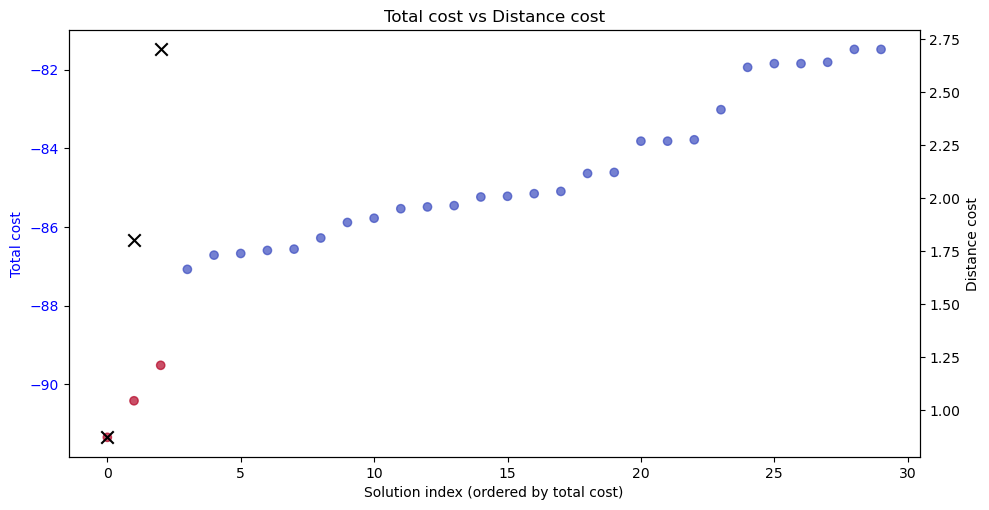

In [5]:
# Check of solutions for the lambdas chosen

# Solution 0

lambdas = all_lambdas_best[0]
startNode = best_solution_startNodes[0]
endNode = best_solution_endNodes[0]
Q_matrix_0,_ = create_QUBO_matrix(distances_N_stops_normalized, p, startNode, endNode, lambdas)
combinations_zipped = brute_force_finding(Q_matrix_0, distances_N_stops_normalized, p)
plot_brute_force_minimums(combinations_zipped, N, p, startNode, endNode, rangePlot=30)

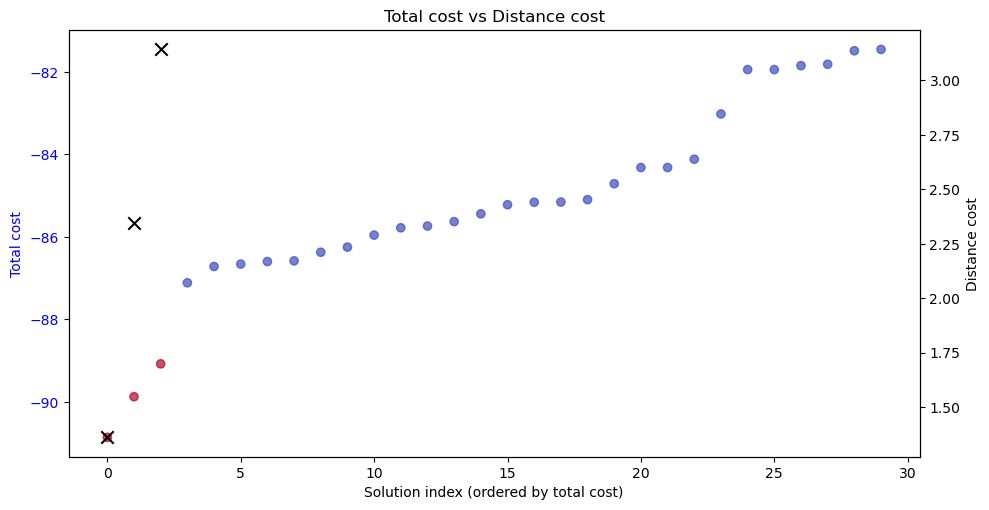

In [14]:
# Check of solutions for the lambdas chosen

# Solution 1


startNode = best_solution_startNodes[1]
endNode = best_solution_endNodes[1]
lambdas = all_lambdas_best[1]
Q_matrix_1,_ = create_QUBO_matrix(distances_N_stops_normalized, p, startNode, endNode, lambdas)
combinations_zipped = brute_force_finding(Q_matrix_1, distances_N_stops_normalized, p)
plot_brute_force_minimums(combinations_zipped, N, p, startNode, endNode, rangePlot=30)

brute_force_solutions = [combinations_zipped[i][0] for i in range(len(combinations_zipped))]
matrix_cost_solutions = [combinations_zipped[i][1] for i in range(len(combinations_zipped))]
distance_cost_solutions = [combinations_zipped[i][2] for i in range(len(combinations_zipped))]
np.savetxt("./data/Q_matrix_optimal_N_{}_p_{}_startNode_{}_endNode_{}".format(N, p, startNode, endNode), Q_matrix_1)
np.savetxt("./data/lambdas_optimal_N_{}_p_{}".format(N,p), lambdas)

with open("./data/brute_force_optimal_N_{}_p_{}_startNode_{}_endNode_{}".format(N, p, startNode, endNode), "w") as f:
    for index, bf_solution in enumerate(brute_force_solutions):
        f.write(str(bf_solution))
        f.write("\n")
        f.write(str(matrix_cost_solutions[index]))
        f.write("\n")
        f.write(str(distance_cost_solutions[index]))
        f.write("\n")
        f.write("\n")
